## Árvores de decisão  

### Introdução

Árvores de decisão, como o nome sugere, são estruturas que imitam o formato de uma árvore, onde cada nó representa um atributo, um ramo representa uma regra de decisão, e as folhas representam saídas, resultados.

De maneira geral, o algoritmo trabalha dividindo o conjunto de dados de acordo com atributos em cada nó, enquanto tenta reduzir a medida de seleção (*Gini index*). Em resumo, o intuito da árvore de decisão é dividir dados até ser capaz de classificar eles de acordo com o objetivo.

Para este exemplo, o conjunto de dados *iris*  disponibilizado pelo *sklearn* será utilizado, dada sua facilidade de implementação. Um aspecto especial do classificador de árvore de decisão do *sklearn* é que as variáveis podem ser categóricas ou numéricas.

Este exemplo foi baseado em código de Philip Wilkinson
https://github.com/UCL-DSS/DecisionTree-classifiers-worksop/blob/main/Decision-Tree%20workshop.ipynb

In [14]:
#Incialmente, como sempre nos códigos em Python, faz-se a importação das bibliotecas necessárias
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn import tree, metrics
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.model_selection import train_test_split

In [2]:
#Carregar os dados
dados = load_iris()

#Fazer a conversão dos dados em um dataframe do Pandas
dataframe = pd.DataFrame(dados.data, columns = dados.feature_names)

#Indicar que a coluna das espécies é o alvo da classificação
dataframe['Species'] = dados.target

In [3]:
#Mostrar alguns exemplos do conjunto de dados
dataframe.sample(10, random_state=1)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
14,5.8,4.0,1.2,0.2,0
98,5.1,2.5,3.0,1.1,1
75,6.6,3.0,4.4,1.4,1
16,5.4,3.9,1.3,0.4,0
131,7.9,3.8,6.4,2.0,2
56,6.3,3.3,4.7,1.6,1
141,6.9,3.1,5.1,2.3,2
44,5.1,3.8,1.9,0.4,0
29,4.7,3.2,1.6,0.2,0
120,6.9,3.2,5.7,2.3,2


In [4]:
#Indicar os alvos da classificação, com as correspondências entre número e nome
alvos = np.unique(dados.target)
nomes_alvos = np.unique(dados.target_names)

alvos = dict(zip(alvos, nomes_alvos))
alvos

{0: 'setosa', 1: 'versicolor', 2: 'virginica'}

In [5]:
#Corrigir os valores alvo no dataframe
dataframe.Species = dataframe['Species'].replace(alvos)

In [6]:
#Visualizar como ficou o resultado
dataframe.sample(10, random_state=1)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
14,5.8,4.0,1.2,0.2,setosa
98,5.1,2.5,3.0,1.1,versicolor
75,6.6,3.0,4.4,1.4,versicolor
16,5.4,3.9,1.3,0.4,setosa
131,7.9,3.8,6.4,2.0,virginica
56,6.3,3.3,4.7,1.6,versicolor
141,6.9,3.1,5.1,2.3,virginica
44,5.1,3.8,1.9,0.4,setosa
29,4.7,3.2,1.6,0.2,setosa
120,6.9,3.2,5.7,2.3,virginica


In [7]:
#Analisar de maneira geral os dados
dataframe.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Text(0, 0.5, 'Frequência')

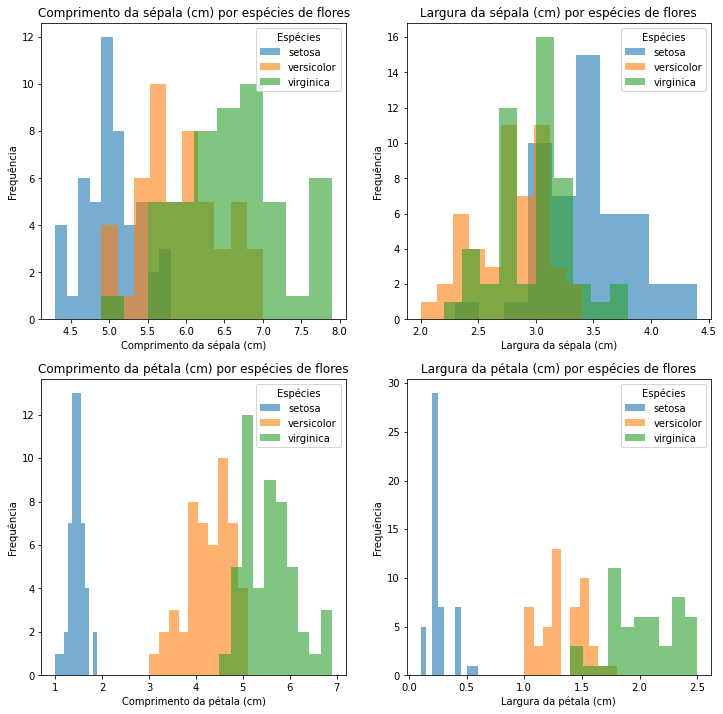

In [8]:
#Uma vez que os dados estão padronizados, pode-se ser feita uma análise visual do conjunto
figura, eixo = plt.subplots(2,2, figsize = (12,12))

for x in nomes_alvos: 
    eixo[0,0].hist(dataframe[dataframe.Species == x]["sepal length (cm)"], alpha = 0.6)
    eixo[0,1].hist(dataframe[dataframe.Species == x]["sepal width (cm)"], alpha = 0.6)
    eixo[1,0].hist(dataframe[dataframe.Species == x]["petal length (cm)"],alpha = 0.6)
    eixo[1,1].hist(dataframe[dataframe.Species == x]["petal width (cm)"], alpha = 0.6)

eixo[0,0].legend(labels = nomes_alvos, title = "Espécies")
eixo[0,0].set_title("Comprimento da sépala (cm) por espécies de flores")
eixo[0,0].set_xlabel("Comprimento da sépala (cm)")
eixo[0,0].set_ylabel("Frequência")

eixo[0,1].legend(labels = nomes_alvos, title = "Espécies")
eixo[0,1].set_title("Largura da sépala (cm) por espécies de flores")
eixo[0,1].set_xlabel("Largura da sépala (cm)")
eixo[0,1].set_ylabel("Frequência")

eixo[1,0].legend(labels = nomes_alvos, title = "Espécies")
eixo[1,0].set_title("Comprimento da pétala (cm) por espécies de flores")
eixo[1,0].set_xlabel("Comprimento da pétala (cm)")
eixo[1,0].set_ylabel("Frequência")

eixo[1,1].legend(labels = nomes_alvos, title = "Espécies")
eixo[1,1].set_title("Largura da pétala (cm) por espécies de flores")
eixo[1,1].set_xlabel("Largura da pétala (cm)")
eixo[1,1].set_ylabel("Frequência")

In [9]:
#Agora, é hora de declarar quais dados fazem parte da entrada (x) e quais são os alvos (y)
y = dataframe["Species"]
x = dataframe.drop(columns="Species")

In [10]:
#Uma vez declarados x e y, divide-se os dados em conjuntos de treino e teste, deixando 30% para testes
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.3, random_state = 1)

In [11]:
#Inicia-se o classificador baseado em Árvore de Decisão, e faz o treinamento do mesmo
classificador = DecisionTreeClassifier(max_depth =3, random_state = 1)
classificador.fit(x_treino, y_treino)

DecisionTreeClassifier(max_depth=3, random_state=1)

In [12]:
#Extração de características dos dados
nomes_caracteristicas = x.columns
caracteristicas = list(x.columns)
label = y.unique()

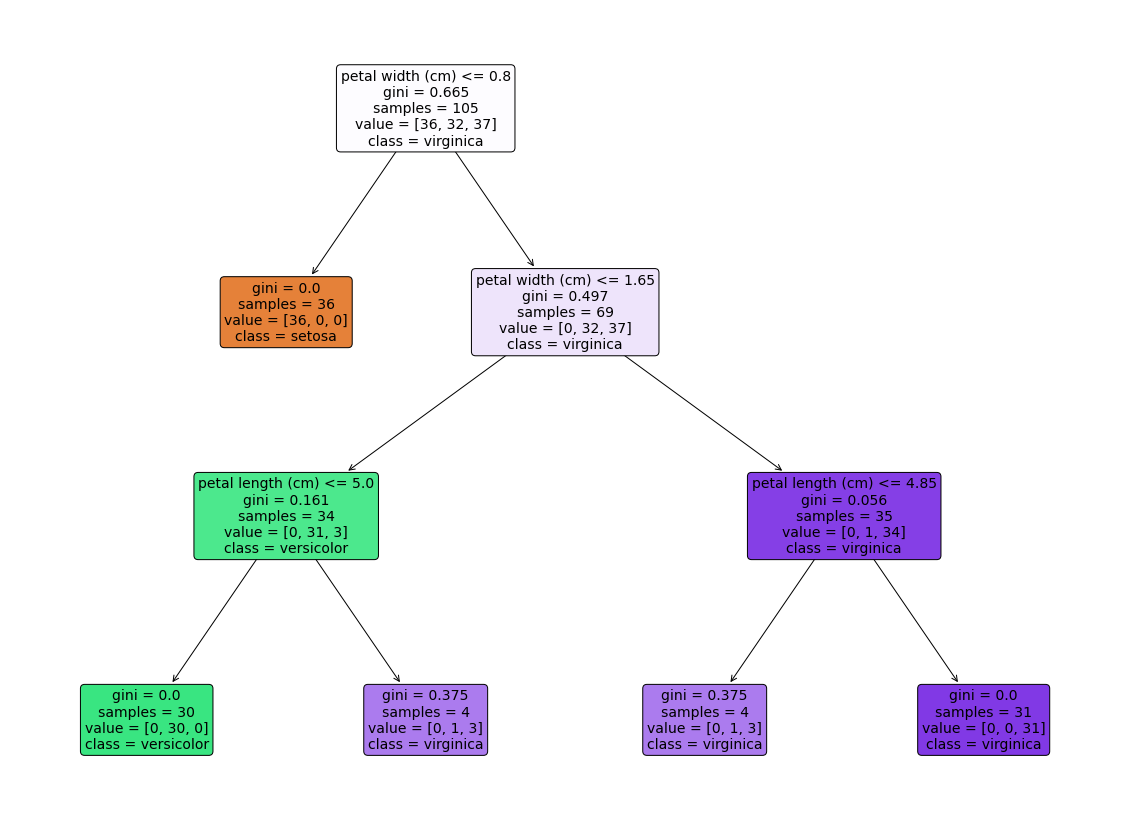

In [13]:
#Visualizar graficamente como ficou a árvore de decisão
plt.figure(figsize=(20,15), facecolor ='w')
a = tree.plot_tree(classificador,
                   feature_names = nomes_caracteristicas,
                   class_names = y.unique(),
                   rounded = True,
                   filled = True,
                   fontsize=14)

plt.show()

In [15]:
#Agora, de maneira textual
regras_arvore = export_text(classificador, feature_names = caracteristicas)
print(regras_arvore)

|--- petal width (cm) <= 0.80
|   |--- class: setosa
|--- petal width (cm) >  0.80
|   |--- petal width (cm) <= 1.65
|   |   |--- petal length (cm) <= 5.00
|   |   |   |--- class: versicolor
|   |   |--- petal length (cm) >  5.00
|   |   |   |--- class: virginica
|   |--- petal width (cm) >  1.65
|   |   |--- petal length (cm) <= 4.85
|   |   |   |--- class: virginica
|   |   |--- petal length (cm) >  4.85
|   |   |   |--- class: virginica



In [16]:
#Usando o modelo treinado, encontrar previsão com valores de teste de entrada
teste_previsão = classificador.predict(x_teste)

In [17]:
#Com os valores obtidos, analsiar a matriz de confusão
matriz_confusao = metrics.confusion_matrix(y_teste, teste_previsão)
print(matriz_confusao)

[[14  0  0]
 [ 0 17  1]
 [ 0  1 12]]


In [18]:
#Para ficar mais fácil, vamos montar um modelo que facilita o aprendizado visualmente
matriz_df = pd.DataFrame(matriz_confusao)

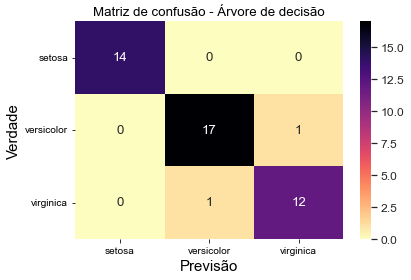

<Figure size 720x576 with 0 Axes>

In [19]:
ax = plt.axes()
sns.set(font_scale=1.1)
plt.figure(figsize=(10,8))
sns.heatmap(matriz_df, annot=True, fmt="g", ax=ax, cmap="magma_r")

ax.set_title('Matriz de confusão - Árvore de decisão')
ax.set_xticklabels(['']+label)
ax.set_xlabel("Previsão", fontsize =15)
ax.set_yticklabels(list(label), rotation = 0)
ax.set_ylabel("Verdade", fontsize=15)
plt.show()

In [32]:
#Uma vez conhecidos os valores de teste, pode-se comparar com o esperado
acuracia = metrics.accuracy_score(y_teste, teste_previsão)
print("Acurácia geral = ", round(acuracia*100, 2), "%")

Acurácia geral =  95.56 %


In [38]:
#Agora analisando a resposta de cada tipo de flor
medidas_por_flor = metrics.precision_score(y_teste, teste_previsão, average=None)
for i in range(len(label)):
    print(label[i], ' = ', round(medidas_por_flor[i]*100, 2), "%")

setosa  =  100.0 %
versicolor  =  94.44 %
virginica  =  92.31 %


In [40]:
#Para obter mais resultados analíticos
resultados = metrics.classification_report(y_teste, teste_previsão)
print(resultados)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       0.94      0.94      0.94        18
   virginica       0.92      0.92      0.92        13

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



## Em resumo, o modelo de árvore de decisão foi excelente para fazer a classificação do conjunto de dados